In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def haar_1d_directe(n,u):
    v = np.copy(u)
    s = (2.0)
    w = np.zeros((n))
    m = n
    while 1 < m :
        m = (m//2)
        w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / s
        w[m:2*m] = (v[0:2*m-1:2] - v[1:2*m:2]) / s
        v[0:2*m] = w[0:2*m]
    return v

def haar_1d_inverse(n,u):
    v = np.copy(u)
    w = np.zeros((n))
    m = 1
    while (m*2 <= n):
        w[0:2*m-1:2] = v[0:m] + v[m:2*m]
        w[1:2*m:2]  = v[0:m] - v[m:2*m]
        v[0:2*m] = w[0:2*m]
        m=2*m        
    return v

In [0]:
#########    EXERCICE 1     ##########


def downsizingQNL(v):
    m = (len(v)//2)
    w = np.zeros((m))
    w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / 2
    return w

def upsizingQNL(v,w2):
    m = len(v)//2
    n = 2*m
    g = np.zeros((m))
    c = np.zeros((m))
    d = np.zeros((m))
    w3 = np.concatenate((w2,w2))
    if m > 1 :
        g[0:m] = np.abs(w3[(m-2)%n:(n-2)%n]-w3[(m-1)%n:(n-1)%n]) + np.abs(w3[(m-1)%n:(n-1)%n]-w3[m:n])
        c[0:m] = np.abs(w3[(m-1)%n:(n-1)%n]-w3[m:n]) + np.abs(w3[0:m]-w3[1:m+1])
        d[0:m] = np.abs(w3[0:m]-w3[1:m+1])+np.abs(w3[1:m+1]-w3[2:m+2])
    w = np.zeros((m))
    for i in range(m) :
        if g[i] < c[i] and g[i] < d[i]:
            w[i] = (w2[i]*(5/8)) + (w2[(i-1)%m]/2) -(w2[(i-2)%m]/8)
        elif d[i] < c[i] and d[i] < g[i]:
            w[i] = (w2[i]*(11/8)) - (w2[(i+1)%m]/2) + (w2[(i+2)%m]/8)
        else:
            w[i] = w2[i] - (w2[(i-1)%m] - w2[(i+1)%m])/8
    w4 = np.zeros((m))
    w4[0:m] = v[0:n:2] - w[0:m]
    return w4

In [0]:
def QNLHaar_1d_directe(x):
    n = len(x)
    v = np.copy(x)
    m = n
    res = np.zeros((0))
    while 1 < m :
      m = (m//2)
      w = downsizingQNL(v)
      w2 = upsizingQNL(v,w)
      res = np.concatenate((w2,res))
      v = np.copy(w)
    res = np.concatenate((v,res))
    return res


def QNLHaar_1d_inverse(x):
    n=1
    i=1
    v = np.copy([x[0]]) 
    while n <= len(x)/2:
        m = 2*n
        w = np.zeros((n))
        w2 = np.concatenate((v,v))
        w3 = np.zeros((m))
        g = np.zeros((n)) 
        c = np.zeros((n)) 
        d = np.zeros((n))
        if n > 1 :
            g[0:n] = np.abs(w2[(n-2)%m:(m-2)%m]-w2[(n-1)%m:(m-1)%m]) + np.abs(w2[(n-1)%m:(m-1)%m]-w2[0:n])
            c[0:n] = np.abs(w2[(n-1)%m:(m-1)%m]-w2[0:n]) + np.abs(w2[0:n]-w2[1:n+1])
            d[0:n] = np.abs(w2[0:n]-w2[1:n+1])+np.abs(w2[1:n+1]-w2[2:n+2])
        for i in range(n):
            if g[i] < c[i] and g[i] < d[i]:
                w[i] = (v[i]*(5/8)) + (v[(i-1)%n]/2) -(v[(i-2)%n]/8)
            elif d[i] < c[i] and d[i] < g[i]:
                w[i] = (v[i]*(11/8)) - (v[(i+1)%n]/2) + (v[(i+2)%n]/8)
            else : 
                w[i] = v[i] - (v[(i-1)%n] - v[(i+1)%n])/8
        w3[0:m-1:2] = w[0:n] + x[n:m]
        w3[1:m:2] = 2*v[0:n]-w3[0:m-1:2]
        res=np.zeros((m))
        for i in range(n):
            res[0:m-1:2] = w3[0:m-1:2]
            res[1:m:2] = w3[1:m:2]
        i=i+n
        v = np.copy(res)
        n = len(res)
    return res

In [27]:
tab = (np.array([1,2,3,4,5,6,7,8],float))

print("EXERCICE 2 direct\n")
haar = QNLHaar_1d_directe(tab)
print(haar)
print("\n\n")


print("EXERCICE 2 inverse\n")
haari = QNLHaar_1d_inverse(haar)
print(haari)

EXERCICE 2 direct

[ 4.5 -2.  -1.  -1.   0.  -1.  -1.   0. ]



EXERCICE 2 inverse

[1. 2. 3. 4. 5. 6. 7. 8.]


In [0]:
def ex1(n):
    y = np.zeros((n))
    for i in range(n):
        y[i] = i+1
    #print(y)
    return y

def ex3(n):
    x = np.zeros((n))
    for i in range(int(n/2)):
        x[i] = np.sin((2*np.pi)*i)
    for i in range(int((n/2)+1),n) :
        x[i] = 1/2 + np.sin((2*np.pi)*i) 
    return x

image1 = np.array([43,41,40,39,35,30,100,79,190,192,150,166,131,140,145,161],float)
e1 = ex1(8)
e3 = ex3(8)

In [29]:
print("EXERCICE 3\n")
print('ex1')
print(e1)
print (QNLHaar_1d_inverse(QNLHaar_1d_directe(e1)))

print('\nex2')
print(image1)
print (QNLHaar_1d_inverse(QNLHaar_1d_directe(image1)))

print('\nex3')
print(e3)
print (QNLHaar_1d_inverse(QNLHaar_1d_directe(e3)))

EXERCICE 3

ex1
[1. 2. 3. 4. 5. 6. 7. 8.]
[1. 2. 3. 4. 5. 6. 7. 8.]

ex2
[ 43.  41.  40.  39.  35.  30. 100.  79. 190. 192. 150. 166. 131. 140.
 145. 161.]
[ 43.  41.  40.  39.  35.  30. 100.  79. 190. 192. 150. 166. 131. 140.
 145. 161.]

ex3
[ 0.00000000e+00 -2.44929360e-16 -4.89858720e-16 -7.34788079e-16
  0.00000000e+00  5.00000000e-01  5.00000000e-01  5.00000000e-01]
[ 6.93889390e-18 -2.38725140e-16 -4.85722573e-16 -7.25781112e-16
  0.00000000e+00  5.00000000e-01  5.00000000e-01  5.00000000e-01]


In [0]:
def seuillage(x,T):
    y = np.copy(x)
    for i in range((len(y))):
        if (np.absolute(y[i]) <= T):
            y[i] = 0.0
    return y

In [31]:
print("EXERCICE 4 \n")
taille = 64
e11 = ex1(taille)
e33 = ex3(taille)

print('ex1')
print(e11)
print('Seuil 12')
print (seuillage(QNLHaar_1d_directe(e11),12))
print (seuillage(haar_1d_directe(taille,e11),12))
print('Seuil 128')
print (seuillage(QNLHaar_1d_directe(e11),128))
print (seuillage(haar_1d_directe(taille,e11),128))

print('\nex2')
print(image1)
print('Seuil 12')
print (seuillage(QNLHaar_1d_directe(image1),12))
print (seuillage(haar_1d_directe(len(image1),image1),12))
print('Seuil 128')
print (seuillage(QNLHaar_1d_directe(image1),128))
print (seuillage(haar_1d_directe(len(image1),image1),128))

print('\nex3')
print(e33)
print('Seuil 12')
print (seuillage(QNLHaar_1d_directe(e33),12))
print (seuillage(haar_1d_directe(taille,e33),12))
print('Seuil 128')
print (seuillage(QNLHaar_1d_directe(e33),128))
print (seuillage(haar_1d_directe(taille,e33),128))

EXERCICE 4 

ex1
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
Seuil 12
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    

In [0]:
def erreur(a,b):
    n = len(a)
    s = 0
    for i in range(n):
        s = s + np.square(np.absolute(a[i]-b[i]))
    s = np.sqrt(s)
    return s

In [33]:
print("\nEXERCICE 5\n")

print('ex1')
print('T=12')
print('QuadHaar')
print (erreur(e11,QNLHaar_1d_inverse(seuillage(e11,12))))
print('Haar')
print (erreur(e11,haar_1d_inverse(taille,seuillage(e11,12))))
print('T=128')
print('QuadHaar')
print (erreur(e11,QNLHaar_1d_inverse(seuillage(e11,128))))
print('Haar')
print (erreur(e11,haar_1d_inverse(taille,seuillage(e11,128))))

print('ex2')
print('T=12')
print('QuadHaar')
print (erreur(image1,QNLHaar_1d_inverse(seuillage(image1,12))))
print('Haar')
print (erreur(image1,haar_1d_inverse(len(image1),seuillage(image1,12))))
print('T=128')
print('QuadHaar')
print (erreur(image1,QNLHaar_1d_inverse(seuillage(image1,128))))
print('Haar')
print (erreur(image1,haar_1d_inverse(len(image1),seuillage(image1,128))))

print('ex3')
print('T=12')
print('QuadHaar')
print (erreur(e33,QNLHaar_1d_inverse(seuillage(e33,12))))
print('Haar')
print (erreur(e33,haar_1d_inverse(taille,seuillage(e33,12))))
print('T=128')
print('QuadHaar')
print (erreur(e33,QNLHaar_1d_inverse(seuillage(e33,128))))
print('Haar')
print (erreur(e33,haar_1d_inverse(taille,seuillage(e33,128))))



EXERCICE 5

ex1
T=12
QuadHaar
600.1041641352774
Haar
547.7955823115042
T=128
QuadHaar
299.0652102802999
Haar
299.0652102802999
ex2
T=12
QuadHaar
942.5075555068511
Haar
851.8485780935482
T=128
QuadHaar
805.2005961249656
Haar
805.2005961249656
ex3
T=12
QuadHaar
2.7838821814149406
Haar
2.7838821814149406
T=128
QuadHaar
2.7838821814149406
Haar
2.7838821814149406


In [0]:
def QNLGraphe(x):
    v = np.zeros((128,2))
    for i in range(128):
        v[i,0] = (erreur(x,QNLHaar_1d_inverse(seuillage(QNLHaar_1d_directe(x),i))))
        v[i,1] = i
    return v 

def graphe(x):
    v = np.zeros((128,2))
    for i in range(128):
        v[i,0] = (erreur(x,haar_1d_inverse(len(x),seuillage(haar_1d_directe(len(x),x),i))))
        v[i,1] = i
    return v

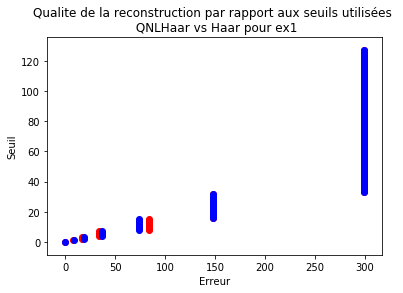

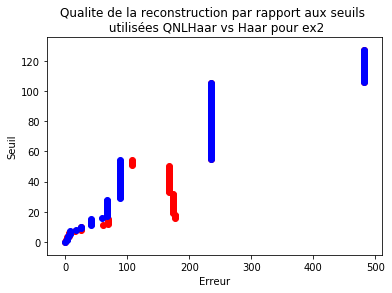

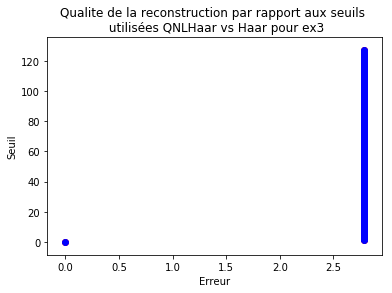

In [35]:
v1 = QNLGraphe(e11)
v2 = graphe(e11)


plt.scatter(v1[:,0],v1[:,1], color="red")
plt.scatter(v2[:,0],v2[:,1], color="blue")
plt.title('Qualite de la reconstruction par rapport aux seuils utilisées \n QNLHaar vs Haar pour ex1')
plt.xlabel('Erreur')
plt.ylabel('Seuil')
plt.show()

v1 = QNLGraphe(image1)
v2 = graphe(image1)


plt.scatter(v1[:,0],v1[:,1], color="red")
plt.scatter(v2[:,0],v2[:,1], color="blue")
plt.title('Qualite de la reconstruction par rapport aux seuils \n utilisées QNLHaar vs Haar pour ex2')
plt.xlabel('Erreur')
plt.ylabel('Seuil')
plt.show()

v1 = QNLGraphe(e33)
v2 = graphe(e33)


plt.scatter(v1[:,0],v1[:,1], color="red")
plt.scatter(v2[:,0],v2[:,1], color="blue")
plt.title('Qualite de la reconstruction par rapport aux seuils \n utilisées QNLHaar vs Haar pour ex3')
plt.xlabel('Erreur')
plt.ylabel('Seuil')
plt.show()